In [1]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
import random
import shutil
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, Flatten, Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
import keras

from tensorflow.keras import models
from tensorflow.keras import layers


Using TensorFlow backend.


In [2]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/msds2020/dreyes/Machine Learning 2.0/Individual Project/Train_data3'

# The directory where we will
# store our smaller dataset
base_dir = os.path.expanduser('~') + '/project_indiv2/results/'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)

# Directory with our training opened eye pictures
train_opened_dir = os.path.join(train_dir, 'opened')
os.makedirs(train_opened_dir, exist_ok=True)

# Directory with our training closed eye pictures
train_closed_dir = os.path.join(train_dir, 'closed')
os.makedirs(train_closed_dir, exist_ok=True)

# Directory with our validation opened eye pictures
validation_opened_dir = os.path.join(validation_dir, 'opened')
os.makedirs(validation_opened_dir, exist_ok=True)

# Directory with our validation closed eye pictures
validation_closed_dir = os.path.join(validation_dir, 'closed')
os.makedirs(validation_closed_dir, exist_ok=True)

# Directory with our test opened eye pictures
test_opened_dir = os.path.join(test_dir, 'opened')
os.makedirs(test_opened_dir, exist_ok=True)

# Directory with our test closed pictures
test_closed_dir = os.path.join(test_dir, 'closed')
os.makedirs(test_closed_dir, exist_ok=True)

# Copy first 300 opened eye images to train_opened_dir
fnames = ['opened.{}.jpg'.format(i) for i in range(1,600)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_opened_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 100 opened eye images to validation_opened_dir
fnames = ['opened.{}.jpg'.format(i) for i in range(600, 800)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_opened_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_opened_dir
fnames = ['opened.{}.jpg'.format(i) for i in range(800, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_opened_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 300 closed eye images to train_closed_dir
fnames = ['closed.{}.jpg'.format(i) for i in range(1,600)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_closed_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 100 closed eye images to validation_closed_dir
fnames = ['closed.{}.jpg'.format(i) for i in range(600, 800)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_closed_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 100 closed eye images to test_closed_dir
fnames = ['closed.{}.jpg'.format(i) for i in range(800, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_closed_dir, fname)
    shutil.copyfile(src, dst)

In [24]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [25]:
 model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 1, 1, 128)        

In [26]:
# from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=keras.optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,    
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(24, 24), 
    batch_size=20,
    color_mode='grayscale',
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(24, 24), 
    batch_size=20, 
    color_mode='grayscale',
    class_mode='binary')

Found 1198 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 24, 24, 1)
labels batch shape: (20,)


In [31]:
# model.compile(optimizer='adam', loss='categorical_crossentropy',
#               metrics=['acc'])

# history = model.fit_generator(train_generator, validation_data=validation_generator,
#                     epochs=100, steps_per_epoch=SPE, validation_steps=VS)

history = model.fit_generator(
                train_generator, 
                validation_data=validation_generator,
                epochs=250, 
                steps_per_epoch=100, 
                validation_steps=50)

model.save('models/model_new4.h5', overwrite=True)

Epoch 1/400
100/100 [==============================] - 6s 55ms/step - loss: 0.1234 - acc: 0.9505 - val_loss: 0.0515 - val_acc: 0.9500
Epoch 2/400
100/100 [==============================] - 5s 54ms/step - loss: 0.1354 - acc: 0.9514 - val_loss: 0.1062 - val_acc: 0.9490
Epoch 3/400
100/100 [==============================] - 5s 53ms/step - loss: 0.1209 - acc: 0.9505 - val_loss: 0.0563 - val_acc: 0.9500
Epoch 4/400
100/100 [==============================] - 5s 53ms/step - loss: 0.1217 - acc: 0.9545 - val_loss: 0.0279 - val_acc: 0.9570
Epoch 5/400
100/100 [==============================] - 5s 54ms/step - loss: 0.1192 - acc: 0.9559 - val_loss: 0.0513 - val_acc: 0.9550
Epoch 6/400
100/100 [==============================] - 5s 53ms/step - loss: 0.1308 - acc: 0.9554 - val_loss: 0.0021 - val_acc: 0.9530
Epoch 7/400
100/100 [==============================] - 5s 54ms/step - loss: 0.1222 - acc: 0.9479 - val_loss: 0.2459 - val_acc: 0.9490
Epoch 8/400
100/100 [==============================] - 5s 53ms

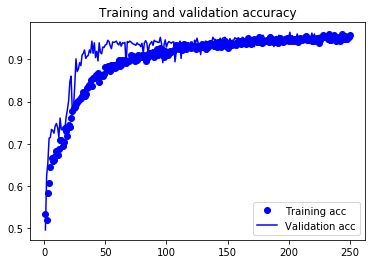

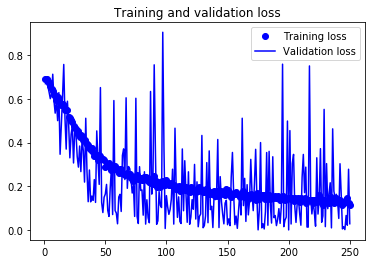

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()